# Experiments with regression trees

In [1]:
import numpy as np
import pylab as pl
import models

## Generate synthetic data 
Simulate data from crazy function and add Gaussian noise.
n is the number of examples to simulate.

In [2]:
def generate_synthetic_1d_data(n):
    X = np.random.uniform(-20, 20, size=n)
    X.sort()
    # Crazy function without noise
    y_noiseless = np.cos(X) * X
    # Add gaussian noise to each data point
    y = y_noiseless + np.random.normal(0, 1.5, size=n)
    X = X.reshape((n,1))
    return X, y, y_noiseless

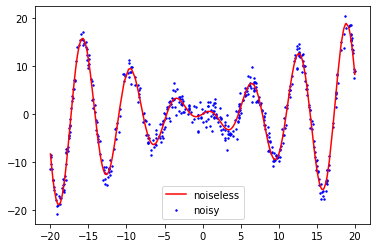

In [3]:
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

pl.scatter(X, y, c='b', s=2, label='noisy');
pl.plot(X, y_noiseless, c='r', label='noiseless')
pl.legend(loc='best');

## Regression trees
Visualize regression tree predictions on sythetic data as a function of the maximum depth (max_depth) of the tree.

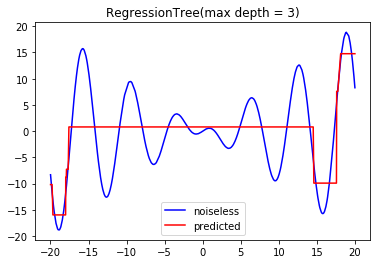

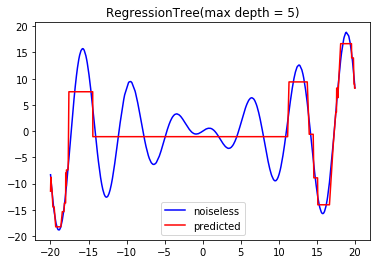

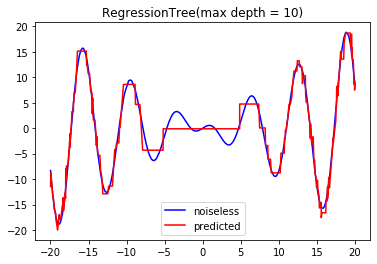

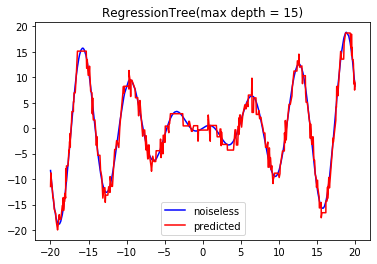

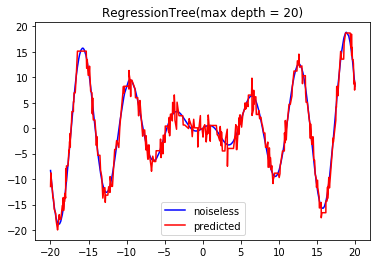

In [4]:
for max_depth in [3, 5, 10, 15, 20]:
    # Fit regression tree
    rt = models.RegressionTree(nfeatures = X.shape[1], max_depth = max_depth)
    rt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'RegressionTree(max depth = {max_depth})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, rt.predict(X), c='r', label='predicted')
    pl.legend(loc='best'); 

## Gradient-boosted regression tree (GBRT) boosting iteration number
Visualize GBRT predictions on sythetic data as a function of the number of number of boosting iterations (n_estimator) used to create the GBRT.

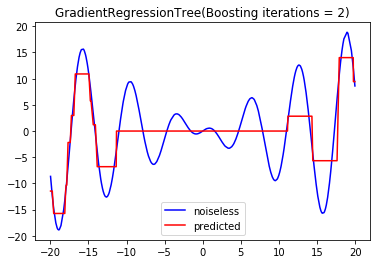

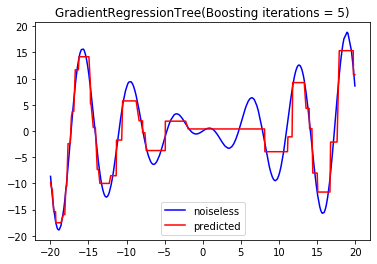

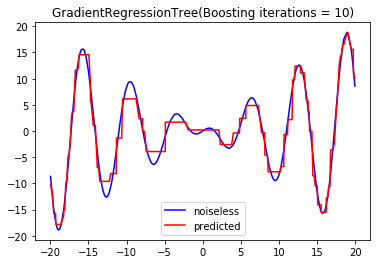

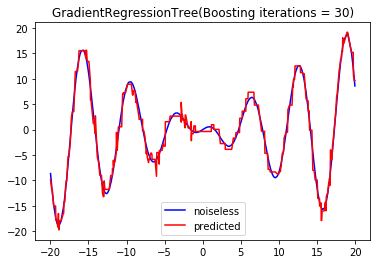

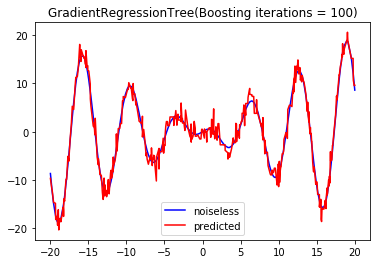

In [5]:
# GBRT hyper-parameters
max_depth=3
regularization_parameter=.75
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

for n_estimator in [2, 5, 10, 30, 100]:
    # Fit the GBR
    gbrt = models.GradientBoostedRegressionTree(
        nfeatures = X.shape[1], 
        max_depth = max_depth, 
        n_estimators = n_estimator, 
        regularization_parameter = regularization_parameter
    )
    gbrt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'GradientRegressionTree(Boosting iterations = {n_estimator})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, gbrt.predict(X), c='r', label='predicted')
    pl.legend(loc='best');


## Gradient-boosted regression tree (GBRT) regularization parameter
Visualize GBRT predictions on sythetic data as a function of the number of number of the regularization parameter

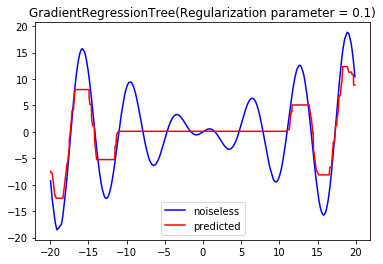

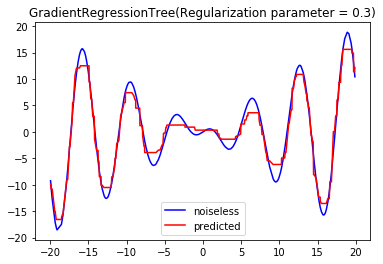

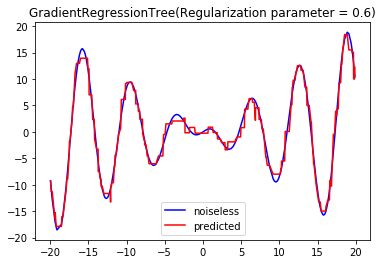

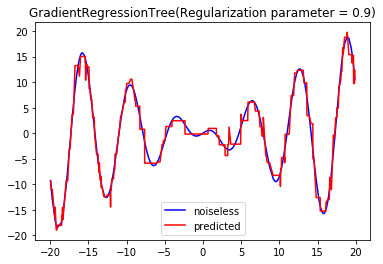

In [6]:
# GBRT hyper-parameters
max_depth=3
n_estimators=20
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

for regularization_parameter in [.1, .3, .6, .9]:
    # Fit the GBR
    gbrt = models.GradientBoostedRegressionTree(
        nfeatures = X.shape[1], 
        max_depth = max_depth, 
        n_estimators = n_estimators, 
        regularization_parameter = regularization_parameter
    )
    gbrt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'GradientRegressionTree(Regularization parameter = {regularization_parameter})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, gbrt.predict(X), c='r', label='predicted')
    pl.legend(loc='best');

## Summary 
At this point, you have successfully run all three experiments in this notebook. Please summarize the emperical results. Try to consider:

1. Explain the qualitative differences in regression learned as a function of depth. Should we set the max depth very high or very low?

The max depth should be kept relatively low. This is really a perfect example of the bias vs variance problem, and we need to find the sweet spot. Setting the max depth too high means that we are effectively memorizing the data, setting it too low we fail to capture any of the structure of the data. Here, it seems like a tree max depth of 5 - 10 models the true function best, any more than that and we capture too much noise

2. Differences in how regression trees and GBRTs fit the data.

The regression tree always captures the peeks of the data, even at a low max depth. A low iterations, the GBRT predictions are scaled down, and as the number of boosting iterations increases the prediction scales up to match the data, this is due to the way each trees prediction wieghted by the regularization parameter is iteratively added to the GBRT. The GBRT is much more resistant to noise that the regression tree alone, especially at low learning rates, at captures the structure of the true function much better without overfitting. If you increase the max depth of the regression tree enough to caputure the middle "curvy" portion of the true function, it terribly overfits noise. However, the GBRT at higher numbers of boosting iterations and lower learing rates beautifully captures this area without overfitting. 

3. The trade-off between the regularization parameter and the number of boosting iterations in the GBRT.

The regularization parameter determines how much effect the prediction of any given tree will have on the GBRT overall prediction. Higher values could lead to overfitting, while to low a value will cause the prediction to appear "scaled down" and provide poor accuracy. How low of a regularization parameter is to low is dependent both on the data (obviously) and number of boosting iterations. For low numbers of boosting iterations, the regularization parameter must be higher in order to get a realistic overall prediction. For a high number of boosting iterations the regularization parameter can be lower, making the model more resistant to overfitting, keeping a higher regularization parameter when not nessesary is a bad idea and will lead to overfitting. (wouldn't it make sense to make the learning rate explicitly dependent on the number of estimators to take into account these issues?)